<img style="float: right;"  src="images/LogoP.jpg" width="200">

# SLab Demo : Arbitrary Waves

This a **demo** Jupyter Notebook for the SLab projects

Version 1.0 (25/6/2018) License information is at the end of the document

---

## Numpy Import

This **Demo** shows a method for generating arbitray waves that can be generated on the **SLab board**

As we need some mathematical functions we will import the [numpy](http://www.numpy.org/) module

Execute the following code cell to load this module

In [1]:
# Import Numpy
import numpy as np

## Wave Generation Functions

The **SLab** module includes a **loadWavetable** function to upload an arbitrary waveform in the Unified Memory Buffer (UMB) of the **hardware board**. 

The module uses this function to provide the methods to upload simple waveforms like square, pulse, triangle, sine and noise waves. But you should not be limited by those waves. If you can define a wave as a sequence of samples, you can upload it to the board.

The following **code cell** defines a series of functions that ease the wave generation:

The first function, **arbNew**, defines two vectors $x$ and $y$ with **np** points. Vector $x$ contains a sequence o values starting on 0 and increasing by one at each element. Vector $y$ is constant and has the same value for all its elements.

The other functions modify the $y$ vectors adding features to a subset of its points

* **arbConst** updates a vector making constant a range of its points
* **arbLinear** updates a vector adding a linear rising or falling line
* **arbTriangle** updates a vector adding a triangular region
* **arbEllipse** updates a vector adding a region with the shape of a half ellypse
* **arbSectorA** updates a vector adding a rising quarter of ellypse region
* **arbSectorB** updates a vector adding a falling quarter of ellypse region

This functions can be used as primitives for generating more complex waves

Execute the following **code cell** to add this functions to Python.

In [2]:
# Creates a new constant wave
def arbNew(np,value=0):
    listx = []
    listy = []
    for point in range(0,np):
        listx.append(point)
        listy.append(value)
    return listx,listy

# Set a constant region in a wave
def arbConst(list,start,stop,value):
    for point in range(start,stop+1):
        list[point]=value
   
# Set a linear region in a wave
def arbLinear(list,start,stop,v1,v2):
    for point in range(start,stop+1):
        list[point]=v1+(v2-v1)*(point-start)/(stop-start)
   
# Set a triangle region in a wave
def arbTriangle(list,start,stop,v1,v2):
    half = start + (stop-start)/2
    for point in range(start,stop+1):
        if point < half:
            list[point]=v1+(v2-v1)*(point-start)/(half-start) 
        else:
            list[point]=v2+(v1-v2)*(point-half)/(stop-half) 
   
# Set an elyptical region in a wave
def arbEllipse(list,start,stop,v1,v2):
    radius = (stop - start)/2
    center = (start+stop)/2
    mult = (v2-v1)/radius
    for point in range(start,stop+1):
        distance = point-center
        list[point]=v1+mult*np.sqrt(radius*radius-distance*distance)
        
# Set an elyptical sector in a wave
def arbSectA(list,start,stop,v1,v2):
    radius = (stop - start)
    center = stop
    mult = (v2-v1)/radius
    for point in range(start,stop+1):
        distance = point-center
        list[point]=v1+mult*np.sqrt(radius*radius-distance*distance)    

# Set an elyptical sector in a wave
def arbSectB(list,start,stop,v1,v2):
    radius = (stop - start)
    center = start
    mult = (v2-v1)/radius
    for point in range(start,stop+1):
        distance = point-center
        list[point]=v1+mult*np.sqrt(radius*radius-distance*distance) 

## Generating a Complex Wave

The following **code cell** uses the previously defined primitives to generate a wave that contains the shapes of a **house** and a **car**.

As a wave can only have one **Y** point for each **X** point. We use two waves to have one **Y1** point and one **Y2** point for each **X** point.

Execute the **code cell** to obtain the two vectors **wavey1** and **wavey1**. We also obtain two vectors **wavex

In [6]:
# Create wave 1
wavex1,wavey1=arbNew(10000,1)

# House roof
arbTriangle(wavey1,1000,5000,2.0,3.0)

# House chimney
arbConst(wavey1,1300,2000,2.7)

# Car front
arbSectA(wavey1,6000,7000,1.0,1.2)

# Car back
arbSectB(wavey1,8500,9000,1.0,1.2)

# Car center
arbConst(wavey1,7000,8500,1.4)

# Create wave 2
wavex2,wavey2=arbNew(10000,1)

# House door
arbConst(wavey2,2000,4000,1.5)

# Car tyres
arbEllipse(wavey2,6500,7000,1.0,0.9)
arbEllipse(wavey2,8000,8500,1.0,0.9)

## Showing the Waves

Now we will importo the **SLab** module so that we can use the **plot1n** function to show the waves we have created.

Execute the following **Code cell** to import this module.

In [4]:
# Import all slab modules
import slab  

Python 3.0 or later detected
SLab Module
Version 1.3 (5/6/2018)
Running interactively



Using the **plot1n** function we can show the waves we have previously generated

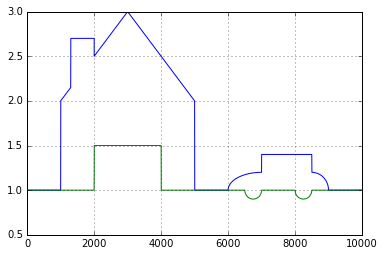

In [5]:
# Show wave   
slab.plot1n(wavex1,[wavey1,wavey2])

# Generating the Waves

Tho generate the waves as time varying voltages, we need to connect with the **hardware board**

In [ ]:
boardFolder = ''                                # Board folder (leave '' if you use only one board)
slab.setFilePrefix('../Files/')                 # Set File Prefix
slab.setCalPrefix('Calibrations/'+boardFolder)  # Set Calibration Prefix         
slab.connect()                                  # Connect to the board

Then we can load **wavey1** as the primary wave and **wavey2** as the secondary wave. As both waves have the same length, they will always be in sync.

We also se the wave frequency to 2Hz. As the waves have 10000 points, the sample frequency will be 20kHz. Using a much higher wave frequency would set a sample frequency outside the capabilities of the **hardware board**.

Note that we could decrease the **resolution** of the wave by decreasing the number of points.

Excute the **code cell** to upload the waves and set their frequency.

In [ ]:
# Upload wave
slab.loadWavetable(wavey1)
slab.loadWavetable(wavey2,second=True)
slab.setWaveFrequency(2.0)

To generate the waves we can use the **wavePlay** command. By setting the first parameter **n** to zero, we make the board to generate the wave forever. By setting the **True** the **dual** parameter we make the board generate the primary wave on **DAC1** and the secondary wave on **DAC2**.

Execute the following **code cell** to generate the wave. The cell will execution forever. This is normal.

In [ ]:
# Show wave
print("Playing wave. Use the board HALT button to end")
slab.wavePlay(0,dual=True)

If you connect the **DAC1** output to one channel of an oscilloscope and the **DAC2** output to another. You can get something like what is shown in the following image:

![Scope](images/Arbitrary_Waves/Scope.png)

If you zoom enough on the wave, you should be able to see the DAC steps.

In order to stop the wave generation, you can press the **halt** button on the **hardware board**

Before closing this document, it is a good idea to disconnect from the board using the following **code cell**

In [ ]:
# Disconnect from the board
slab.disconnect()

## Document license

Copyright  ©  Vicente Jiménez (2018)  
This work is licensed under a Creative Common Attribution-ShareAlike 4.0 International license.  
This license is available at http://creativecommons.org/licenses/by-sa/4.0/

<img  src="images/cc_sa.png" width="200">